# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

587

In [3]:
for city in cities:
    print(city)

kodiak
campbell river
pisco
ushuaia
codo
busselton
rocha
palabuhanratu
micheweni
lagoa
sao filipe
mahebourg
krasnoselkup
nikolskoye
rikitea
amuntai
richards bay
lexington
moyuta
lompoc
vaini
amderma
pangnirtung
salamiyah
port lincoln
port alfred
kaitangata
odweyne
ketchikan
sankt veit
hobart
iracoubo
albany
hilo
hermanus
marcona
novyy urengoy
atuona
alice springs
illoqqortoormiut
chuy
avarua
bethel
geraldton
punta arenas
bontang
kot samaba
masumbwe
hasaki
mataura
tiksi
saskylakh
berlevag
derzhavinsk
lebu
east london
ulladulla
natal
te anau
husavik
thompson
yinchuan
bambous virieux
kapaa
stykkisholmur
new norfolk
siruguppa
cape town
bluff
barrow
wenling
menongue
dalvik
castro
mount isa
broken hill
katherine
bengkulu
roald
harper
warqla
hami
puteyets
bandarbeyla
ambilobe
tuktoyaktuk
severo-kurilsk
pevek
tsihombe
ribeira grande
port elizabeth
bloomington
bredasdorp
yar-sale
saint-philippe
mpophomeni
chapais
nikolsk
kazalinsk
aflu
batemans bay
mullaitivu
vardo
chokurdakh
yellowknife
imbitu

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
cities

['kodiak',
 'campbell river',
 'pisco',
 'ushuaia',
 'codo',
 'busselton',
 'rocha',
 'palabuhanratu',
 'micheweni',
 'lagoa',
 'sao filipe',
 'mahebourg',
 'krasnoselkup',
 'nikolskoye',
 'rikitea',
 'amuntai',
 'richards bay',
 'lexington',
 'moyuta',
 'lompoc',
 'vaini',
 'amderma',
 'pangnirtung',
 'salamiyah',
 'port lincoln',
 'port alfred',
 'kaitangata',
 'odweyne',
 'ketchikan',
 'sankt veit',
 'hobart',
 'iracoubo',
 'albany',
 'hilo',
 'hermanus',
 'marcona',
 'novyy urengoy',
 'atuona',
 'alice springs',
 'illoqqortoormiut',
 'chuy',
 'avarua',
 'bethel',
 'geraldton',
 'punta arenas',
 'bontang',
 'kot samaba',
 'masumbwe',
 'hasaki',
 'mataura',
 'tiksi',
 'saskylakh',
 'berlevag',
 'derzhavinsk',
 'lebu',
 'east london',
 'ulladulla',
 'natal',
 'te anau',
 'husavik',
 'thompson',
 'yinchuan',
 'bambous virieux',
 'kapaa',
 'stykkisholmur',
 'new norfolk',
 'siruguppa',
 'cape town',
 'bluff',
 'barrow',
 'wenling',
 'menongue',
 'dalvik',
 'castro',
 'mount isa',
 'brok

In [8]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [9]:
#print(url)

response = requests.get(url + "&q=" + "los angeles").json()
response

{'coord': {'lon': -118.24, 'lat': 34.05},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 54.59,
  'pressure': 1022,
  'humidity': 86,
  'temp_min': 51.8,
  'temp_max': 57.92},
 'visibility': 16093,
 'wind': {'speed': 1.36, 'deg': 54.0015},
 'clouds': {'all': 1},
 'dt': 1546919880,
 'sys': {'type': 1,
  'id': 3694,
  'message': 0.0065,
  'country': 'US',
  'sunrise': 1546959551,
  'sunset': 1546995631},
 'id': 5368361,
 'name': 'Los Angeles',
 'cod': 200}

In [34]:
# loop through list of cities do an api call for every city
lat = []
lon = []
city_name = []
wind_speed = []
temp = []
temp_max = []
humidity = []
clouds = []
country = []
dt = []

for city in cities:
    try: 
        # perform an API call 
        weather = requests.get(url + "&q=" + city).json()

        # parse the data into our respective lists 
        lat.append(weather["coord"]["lat"])
        lon.append(weather["coord"]["lon"])
        city_name.append(weather["name"])
        wind_speed.append(weather["wind"]["speed"])
        temp_max.append(weather["main"]["temp_max"])
        humidity.append(weather["main"]["humidity"])
        clouds.append(weather["clouds"]["all"])
        country.append(weather["sys"]["country"])
        dt.append(weather["dt"])
    except: 
        print(city + " not found")
        pass 

palabuhanratu not found
krasnoselkup not found
amderma not found
odweyne not found
marcona not found
illoqqortoormiut not found
bengkulu not found
warqla not found
tsihombe not found
kazalinsk not found
aflu not found
mullaitivu not found
yirol not found
grand river south east not found
taolanaro not found
arkhangelos not found
sedelnikovo not found
bargal not found
vaitupu not found
tumannyy not found
nizhneyansk not found
toliary not found
belushya guba not found
bardiyah not found
barentsburg not found
lolua not found
achisay not found
mys shmidta not found
saleaula not found
attawapiskat not found
umzimvubu not found
galiwinku not found
labutta not found
ksenyevka not found
da nang not found
buariki not found
tsienyane not found
sentyabrskiy not found
tuggurt not found
daxian not found
jarjis not found
karakose not found
sorvag not found
tukrah not found
kamenskoye not found
gumushane not found
masjed-e soleyman not found
zolotinka not found
asau not found
bolungarvik not found
bol

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [35]:
weather

{'coord': {'lon': 76.93, 'lat': 52.04},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 3.2,
  'pressure': 1013,
  'humidity': 84,
  'temp_min': 3.2,
  'temp_max': 3.2},
 'visibility': 10000,
 'wind': {'speed': 3.71, 'deg': 106.001},
 'clouds': {'all': 75},
 'dt': 1546921800,
 'sys': {'type': 1,
  'id': 8832,
  'message': 0.0034,
  'country': 'KZ',
  'sunrise': 1546916313,
  'sunset': 1546945168},
 'id': 1524298,
 'name': 'Aksu',
 'cod': 200}

In [36]:
print(city_name)

['Kodiak', 'Campbell River', 'Pisco', 'Ushuaia', 'Codo', 'Busselton', 'Rocha', 'Micheweni', 'Lagoa', 'Sao Filipe', 'Mahebourg', 'Nikolskoye', 'Rikitea', 'Amuntai', 'Richards Bay', 'Lexington', 'Moyuta', 'Lompoc', 'Vaini', 'Pangnirtung', 'Salamiyah', 'Port Lincoln', 'Port Alfred', 'Kaitangata', 'Ketchikan', 'Sankt Veit', 'Hobart', 'Iracoubo', 'Albany', 'Hilo', 'Hermanus', 'Novyy Urengoy', 'Atuona', 'Alice Springs', 'Chuy', 'Avarua', 'Bethel', 'Geraldton', 'Punta Arenas', 'Bontang', 'Kot Samaba', 'Masumbwe', 'Hasaki', 'Mataura', 'Tiksi', 'Saskylakh', 'Berlevag', 'Derzhavinsk', 'Lebu', 'East London', 'Ulladulla', 'Natal', 'Te Anau', 'Husavik', 'Thompson', 'Yinchuan', 'Bambous Virieux', 'Kapaa', 'Stykkisholmur', 'New Norfolk', 'Siruguppa', 'Cape Town', 'Bluff', 'Barrow', 'Wenling', 'Menongue', 'Dalvik', 'Castro', 'Mount Isa', 'Broken Hill', 'Katherine', 'Roald', 'Harper', 'Hami', 'Puteyets', 'Bandarbeyla', 'Ambilobe', 'Tuktoyaktuk', 'Severo-Kurilsk', 'Pevek', 'Ribeira Grande', 'Port Elizab

In [75]:
# parse data into list and build dataframe
# output to csv
# merged_df.to_csv("name.csv")

# build the dataframe
df = pd.DataFrame({"City": city_name, "Cloudiness": clouds, "Country": country, "Date": dt, 
                   "Humidity": humidity, "Lat": lat, "Lng": lon, "Max Temp": temp_max, "Wind Speed": wind_speed, 
                  })

In [40]:
# Print all of them out here
print(len(city_name), len(lat), len(lon), len(temp), len(wind_speed), len(humidity), len(clouds), len(dt), len(country), len(temp_max))

528 528 528 0 528 528 528 528 528 528


In [42]:
print(clouds)

[1, 20, 0, 75, 8, 36, 0, 56, 0, 0, 75, 75, 76, 80, 44, 90, 0, 1, 0, 12, 20, 20, 88, 0, 90, 90, 40, 92, 90, 75, 12, 32, 80, 0, 0, 75, 90, 90, 75, 12, 0, 88, 75, 0, 20, 32, 75, 92, 0, 40, 76, 20, 0, 68, 90, 88, 75, 20, 48, 40, 0, 0, 88, 0, 76, 48, 92, 20, 40, 0, 0, 92, 1, 0, 76, 88, 44, 75, 56, 0, 75, 1, 1, 8, 20, 90, 0, 90, 88, 64, 90, 64, 75, 20, 0, 0, 20, 8, 32, 0, 36, 20, 0, 0, 76, 75, 0, 92, 76, 40, 75, 80, 12, 76, 88, 44, 36, 92, 76, 40, 8, 24, 1, 48, 40, 8, 68, 76, 64, 88, 76, 92, 75, 0, 90, 20, 8, 88, 24, 0, 68, 12, 48, 56, 0, 0, 20, 40, 0, 56, 12, 88, 75, 20, 20, 92, 90, 5, 0, 90, 20, 0, 48, 80, 92, 75, 75, 56, 75, 20, 80, 44, 90, 20, 92, 64, 48, 20, 44, 64, 92, 90, 36, 0, 0, 90, 8, 90, 88, 20, 0, 92, 8, 1, 20, 76, 20, 0, 0, 88, 76, 0, 88, 64, 75, 88, 76, 24, 90, 0, 0, 75, 20, 64, 0, 75, 0, 24, 8, 32, 24, 40, 90, 68, 44, 8, 0, 40, 100, 0, 1, 20, 12, 0, 92, 48, 75, 90, 90, 80, 88, 92, 75, 8, 0, 24, 0, 40, 75, 75, 75, 0, 80, 90, 75, 90, 75, 75, 0, 8, 76, 0, 90, 20, 92, 40, 0, 0, 8

In [43]:
df
#df.plot(x='latitute', y='temperature', kind='scatter')
#plt.scatter(x=df["latitutde"], y=df["temperature"])
#plt.title('titlehere')
#plt.ylabel('temp')
#plt.xlabel('lat')
#plt.savefig('fig1.png')

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kodiak,1,US,1546923300,60,39.95,-94.76,41.00,9.17
1,Campbell River,20,CA,1546920000,92,50.02,-125.24,30.20,2.24
2,Pisco,0,PE,1546920000,88,-13.71,-76.20,71.60,10.29
3,Ushuaia,75,AR,1546920000,86,-54.81,-68.31,41.00,8.05
4,Codo,8,ID,1546924182,84,-8.13,112.72,83.77,7.18
5,Busselton,36,AU,1546924182,70,-33.64,115.35,78.46,11.43
6,Rocha,0,UY,1546924182,96,-34.48,-54.34,62.08,5.17
7,Micheweni,56,TZ,1546924505,100,-4.97,39.83,82.33,14.34
8,Lagoa,0,PT,1546921800,70,37.14,-8.45,42.80,8.05
9,Sao Filipe,0,CV,1546924183,100,14.90,-24.50,72.38,11.32


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

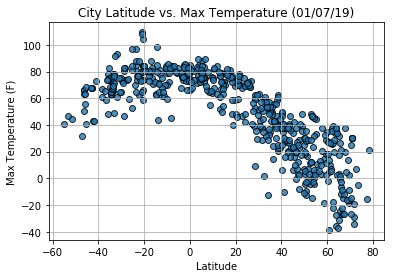

In [71]:
plt.scatter(x = lat, y = temp_max,
            c='tab:blue', marker='o', alpha=0.8, 
            edgecolor='black', linewidth=1)

# Build the scatter plots for each city types
# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

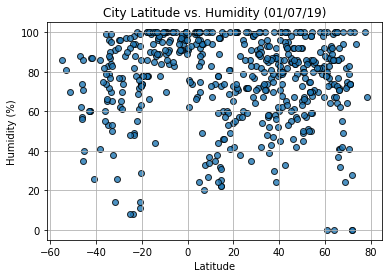

In [72]:
plt.scatter(x = lat, y = humidity,
            c='tab:blue', marker='o', alpha=0.8, 
            edgecolor='black', linewidth=1)

# Build the scatter plots for each city types
# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

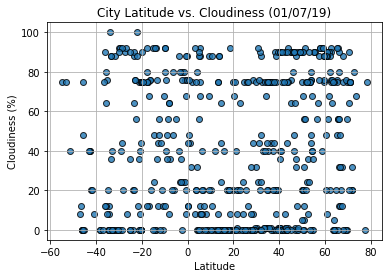

In [73]:
plt.scatter(x = lat, y = clouds,
            c='tab:blue', marker='o', alpha=0.8, 
            edgecolor='black', linewidth=1)

# Build the scatter plots for each city types
# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

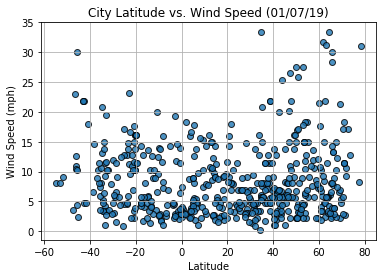

In [74]:
plt.scatter(x = lat, y = wind_speed,
            c='tab:blue', marker='o', alpha=0.8, 
            edgecolor='black', linewidth=1)

# Build the scatter plots for each city types
# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Show plot
plt.show()

In [ ]:
# "What's the weather like as we approach the equator?"
# Here are some observable trends based on the data:

# Maximum temperatures tend to be highest at the equator, therefore cities with latitude 
# closest to 0 will typically have the highest temperatures. 

# Maximum temperatures appear to decrease significantly towards the northern latitudes,
# reaching their lowest levels (-40%) near 60 degrees north. 
# A determining factor is likely the prevalence of greater numbers of cities at or around 
# 60 degrees north, versus fewer cities existing at 40 degrees south 
# (and land mass is greater in the northern versus southern hemispheres). 

# City latitude is not generally a determinant of humidity as levels vary across all latudinal zones, 
# although higher levels of humidity appear to be more prevalent than lower levels of humidity. 

# The cloudiness factor does not initially seem dependent upon city latitude, however
# there does appear to be a prevalence of concentrated areas of cloudiness (80-95%) 
# and lack thereof (0%) across all latitudes.

# While in general wind speed seems evenly distributed across latitudes, there is a slight dip in wind speed 
# closer to the equator and the 20th degree north latitude. 
# Conversely, wind speed appears to increase towards the 40 degree south and 60 degree north latitudes. 